# Toronto Dwellings Analysis

In this assignment, you will perform fundamental analysis for the Toronto dwellings market to allow potential real estate investors to choose rental investment properties.

In [62]:
# imports
import panel as pn
pn.extension('plotly')
from panel.interact import interact
from panel import widgets
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from pathlib import Path
from dotenv import load_dotenv
import hvplot.pandas

In [132]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("MAPBOX")

## Load Data

In [5]:
# Read the census data into a Pandas DataFrame
file_path = Path("toronto_neighbourhoods_census_data.csv")
to_data = pd.read_csv(file_path, index_col="year")
to_data.head()

,neighbourhood,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
year,,,,,,,,,,,,
2001,Agincourt North,3715,1480,0,1055,1295,195,185,5,200388,810,870
2001,Agincourt South-Malvern West,3250,1835,0,545,455,105,425,0,203047,806,892
2001,Alderwood,3175,315,0,470,50,185,370,0,259998,817,924
2001,Annex,1060,6090,5,1980,605,275,3710,165,453850,1027,1378
2001,Banbury-Don Mills,3615,4465,0,240,380,15,1360,0,371864,1007,1163


- - - 

## Dwelling Types Per Year

In this section, you will calculate the number of dwelling types per year. Visualize the results using bar charts and the Pandas plot function. 

**Hint:** Use the Pandas `groupby` function.

**Optional challenge:** Plot each bar chart in a different color.

In [20]:
# Calculate the sum number of dwelling types units per year (hint: use groupby)
yearly_dwelling_units = to_data.groupby(['year']).sum()
yearly_dwelling_units

,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
year,,,,,,,,,,,
2001,300930,355015,75,90995,52355,23785,116900,3040,40583604,118563,152031
2006,266860,379400,165,69430,54690,44095,162850,1335,59368353,184352,129558
2011,274940,429220,100,72480,60355,44750,163895,2165,74259461,202750,142771
2016,269680,493270,95,71200,61565,48585,165575,2845,92969566,246584,175885


In [13]:
# Save the dataframe as a csv file
yearly_dwelling_units.to_csv("Grouped_yearly_dwelling_stats.csv")

In [21]:
yearly_dwelling_count_averaged_cost_removed = yearly_dwelling_units.drop(['average_house_value', 'shelter_costs_owned', 'shelter_costs_rented'], axis=1)

In [30]:
for i in range(0, len(yearly_dwelling_count_averaged_cost_removed)):
    bar = yearly_dwelling_units.iloc[i].hvplot.bar()
bar

:Bars   [index]   (2016)

In [22]:
yearly_dwelling_units.iloc[0].hvplot.bar()

:Bars   [index]   (2001)

In [24]:
# Helper create_bar_chart function
def create_bar_chart(data, year, title, xlabel, ylabel, color):
    """
    Create a barplot based in the data argument.
    """
    bar_plot = data.loc[year].hvplot.bar(xlabel=xlabel, ylabel=ylabel, title=title, rot=90, color=color, height=500)
    
    return bar_plot
    

In [33]:
# Create a bar chart per year to show the number of dwelling types
create_bar_chart(yearly_dwelling_count_averaged_cost_removed, 2001, title='Dwelling Types in Toronto in 2001', xlabel='2001', ylabel='Dwelling Type Units', color='blue')

:Bars   [index]   (2001)

In [37]:
create_bar_chart(yearly_dwelling_count_averaged_cost_removed, 2006, title='Dwelling Types in Toronto in 2006', xlabel='2006', ylabel='Dwelling Type Units', color='red')

:Bars   [index]   (2006)

In [38]:
create_bar_chart(yearly_dwelling_count_averaged_cost_removed, 2011, title='Dwelling Types in Toronto in 2011', xlabel='2011', ylabel='Dwelling Type Units', color='green')

:Bars   [index]   (2011)

In [39]:
create_bar_chart(yearly_dwelling_count_averaged_cost_removed, 2016, title='Dwelling Types in Toronto in 2016', xlabel='2016', ylabel='Dwelling Type Units', color='purple')

:Bars   [index]   (2016)

- - - 

## Average Monthly Shelter Costs in Toronto Per Year

In this section, you will calculate the average monthly shelter costs for owned and rented dwellings and the average house value for each year. Plot the results as a line chart.

**Optional challenge:** Plot each line chart in a different color.

In [40]:
# Calculate the average monthly shelter costs for owned and rented dwellings
average_shelter_cost = to_data.groupby(['year']).mean()[['shelter_costs_owned', 'shelter_costs_rented']]
average_shelter_cost

,shelter_costs_owned,shelter_costs_rented
year,,
2001,846.878571,1085.935714
2006,1316.800000,925.414286
2011,1448.214286,1019.792857
2016,1761.314286,1256.321429


In [48]:
# Helper create_line_chart function
def create_line_chart(data, factor, title, xlabel, ylabel, color):
    """
    Create a line chart based in the data argument.
    """
    line_plot = data[factor].hvplot.line(xlabel=xlabel, ylabel=ylabel, title=title, color=color, height=500)
    
    return line_plot

In [49]:
create_line_chart(average_shelter_cost, factor=average_shelter_cost.columns[0], title='Average Monthly Shelter Cost for Owned Dwellings in Toronto', xlabel='Year', ylabel='Avg Monthly Shelter Costs', color='blue')

:Curve   [year]   (shelter_costs_owned)

In [50]:
create_line_chart(average_shelter_cost, factor=average_shelter_cost.columns[1], title='Average Monthly Shelter Cost for Owned Dwellings in Toronto', xlabel='Year', ylabel='Avg Monthly Shelter Costs', color='green')

:Curve   [year]   (shelter_costs_rented)

## Average House Value per Year

In this section, you want to determine the average house value per year. An investor may want to understand better the sales price of the rental property over time. For example, a customer will want to know if they should expect an increase or decrease in the property value over time so they can determine how long to hold the rental property. You will visualize the `average_house_value` per year as a bar chart.

In [53]:
# Calculate the average house value per year
average_house_value = to_data.groupby(['year']).mean()['average_house_value']
average_house_value

year
2001    289882.885714
2006    424059.664286
2011    530424.721429
2016    664068.328571
Name: average_house_value, dtype: float64

In [56]:
# Plot the average house value per year as a line chart
average_house_value.hvplot.line(title='Average House Value Per Year', height=500)

:Curve   [year]   (average_house_value)

- - - 

## Average House Value by Neighbourhood

In this section, you will use `hvplot` to create an interactive visualization of the average house value with a dropdown selector for the neighbourhood.

**Hint:** It will be easier to create a new DataFrame from grouping the data and calculating the mean house values for each year and neighbourhood.

In [86]:
# Create a new DataFrame with the mean house values by neighbourhood per year
neighborhood_data = to_data.groupby(['year', 'neighbourhood']).mean()['average_house_value'].reset_index()
neighborhood_data.set_index('year', inplace=True)

In [92]:
neighborhood_data

,neighbourhood,average_house_value
year,,
2001,Agincourt North,200388
2001,Agincourt South-Malvern West,203047
2001,Alderwood,259998
2001,Annex,453850
2001,Banbury-Don Mills,371864
...,...,...
2016,Wychwood,787760
2016,Yonge-Eglinton,1127052
2016,Yonge-St.Clair,1131888


In [89]:
# Use hvplot to create an interactive line chart of the average house value per neighbourhood
# The plot should have a dropdown selector for the neighbourhood
neighborhoods = list(neighborhood_data['neighbourhood'])
def create_interactive_line_chart(area):
    chart_data = neighborhood_data[neighborhood_data['neighbourhood']==area]['average_house_value'].hvplot.line(title=area, height=500, width=1200)
    
    return chart_data

In [90]:
interact(create_interactive_line_chart, area=neighborhoods)

Column
    [0] Column
        [0] Select(name='area', options=['Agincourt North', ...], value='Agincourt North')
    [1] Row
        [0] HoloViews(Curve, name='interactive10569')

## Number of Dwelling Types per Year

In this section, you will use `hvplot` to create an interactive visualization of the average number of dwelling types per year with a dropdown selector for the neighbourhood.

In [97]:
# Fetch the data of all dwelling types per year
to_data

,neighbourhood,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
year,,,,,,,,,,,,
2001,Agincourt North,3715,1480,0,1055,1295,195,185,5,200388,810,870
2001,Agincourt South-Malvern West,3250,1835,0,545,455,105,425,0,203047,806,892
2001,Alderwood,3175,315,0,470,50,185,370,0,259998,817,924
2001,Annex,1060,6090,5,1980,605,275,3710,165,453850,1027,1378
2001,Banbury-Don Mills,3615,4465,0,240,380,15,1360,0,371864,1007,1163
...,...,...,...,...,...,...,...,...,...,...,...,...
2016,Wychwood,920,1295,0,880,290,395,2080,35,787760,1864,1146
2016,Yonge-Eglinton,1400,1995,0,465,60,310,1445,0,1127052,2398,1535
2016,Yonge-St.Clair,520,4315,0,450,220,130,1370,0,1131888,2192,1619


In [101]:
dwelling_types = to_data.drop(['average_house_value', 'shelter_costs_owned', 'shelter_costs_rented'], axis=1)

In [107]:
# Use hvplot to create an interactive bar chart of the number of dwelling types per neighbourhood
# The plot should have a dropdown selector for the neighbourhood
def create_interactive_bar_chart(area):
    chart_data = dwelling_types[dwelling_types['neighbourhood']==area].hvplot.bar(title=area, rot=90, height=500, width=1200)
    
    return chart_data

In [108]:
interact(create_interactive_bar_chart, area= neighborhoods)

Column
    [0] Column
        [0] Select(name='area', options=['Agincourt North', ...], value='Agincourt North')
    [1] Row
        [0] HoloViews(Bars, name='interactive13003')

- - - 

## The Top 10 Most Expensive Neighbourhoods

In this section, you will need to calculate the house value for each neighbourhood and then sort the values to obtain the top 10 most expensive neighbourhoods on average. Plot the results as a bar chart.

In [119]:
# Getting the data from the top 10 expensive neighbourhoods
top_10_neighborhoods = to_data.groupby(['neighbourhood']).max().sort_values(by=['average_house_value'], ascending=False).head(10).reset_index()
top_10_neighborhoods

,neighbourhood,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
0,Bridle Path-Sunnybrook-York Mills,2285,590,0,45,230,30,80,0,2124653,2903,2942
1,Forest Hill South,1815,2440,5,65,50,85,1050,15,1664653,2383,1486
2,Lawrence Park South,3590,925,0,170,70,250,1025,40,1522732,2644,1630
3,Rosedale-Moore Park,2610,4990,0,520,260,345,1735,5,1522193,2498,1809
4,St.Andrew-Windfields,3285,1745,0,220,560,120,645,10,1390616,2516,1565
5,Casa Loma,1035,2680,0,415,220,185,1240,5,1365503,2434,1841
6,Bedford Park-Nortown,4985,2080,0,45,65,335,1320,115,1295007,2418,1491
7,Forest Hill North,1565,3430,0,15,30,115,485,5,1185419,2316,1428
8,Kingsway South,2370,790,0,70,50,30,340,10,1173663,2173,2020
9,Yonge-St.Clair,670,4315,0,450,220,280,1465,25,1131888,2192,1619


In [120]:
# Plotting the data from the top 10 expensive neighbourhoods
top_10_neighborhoods['average_house_value'].hvplot.bar(title='Top 10 Neighborhoods By Cost', rot=90, height=500, width=1200)

:Bars   [index]   (average_house_value)

- - - 

## Neighbourhood Map

In this section, you will read in neighbourhoods location data and build an interactive map with the average house value per neighbourhood. Use a `scatter_mapbox` from Plotly express to create the visualization. Remember, you will need your Mapbox API key for this.

### Load Location Data

In [121]:
# Load neighbourhoods coordinates data
file_path = Path("toronto_neighbourhoods_coordinates.csv")
df_neighbourhood_locations = pd.read_csv(file_path)
df_neighbourhood_locations.head()

,neighbourhood,lat,lon
0,Agincourt North,43.805441,-79.266712
1,Agincourt South-Malvern West,43.788658,-79.265612
2,Alderwood,43.604937,-79.541611
3,Annex,43.671585,-79.404001
4,Banbury-Don Mills,43.737657,-79.349718


### Data Preparation

You will need to join the location data with the mean values per neighbourhood.

1. Calculate the mean values for each neighbourhood.

2. Join the average values with the neighbourhood locations.

In [124]:
# Calculate the mean values for each neighborhood
to_average_data = to_data.groupby(['neighbourhood']).mean().reset_index()
to_average_data.head()

,neighbourhood,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
0,Agincourt North,3435.00,1947.50,2.50,863.75,1406.25,512.50,547.50,10.00,329811.5,1109.00,983.50
1,Agincourt South-Malvern West,2897.50,2180.00,1.25,375.00,456.25,523.75,628.75,32.50,334189.0,1131.25,985.00
2,Alderwood,2903.75,302.50,1.25,503.75,76.25,302.50,502.50,1.25,427922.5,1166.75,1003.25
3,Annex,751.25,7235.00,1.25,1375.00,613.75,355.00,4605.00,83.75,746977.0,1692.75,1315.25
4,Banbury-Don Mills,3572.50,5388.75,1.25,273.75,626.25,32.50,1340.00,0.00,612039.0,1463.50,1242.75


In [130]:
# Join the average values with the neighbourhood locations
to_average_data_merged_location = pd.merge(left=to_average_data, right=df_neighbourhood_locations, on='neighbourhood', how='inner')
to_average_data_merged_location.head()

,neighbourhood,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented,lat,lon
0,Agincourt North,3435.00,1947.50,2.50,863.75,1406.25,512.50,547.50,10.00,329811.5,1109.00,983.50,43.805441,-79.266712
1,Agincourt South-Malvern West,2897.50,2180.00,1.25,375.00,456.25,523.75,628.75,32.50,334189.0,1131.25,985.00,43.788658,-79.265612
2,Alderwood,2903.75,302.50,1.25,503.75,76.25,302.50,502.50,1.25,427922.5,1166.75,1003.25,43.604937,-79.541611
3,Annex,751.25,7235.00,1.25,1375.00,613.75,355.00,4605.00,83.75,746977.0,1692.75,1315.25,43.671585,-79.404001
4,Banbury-Don Mills,3572.50,5388.75,1.25,273.75,626.25,32.50,1340.00,0.00,612039.0,1463.50,1242.75,43.737657,-79.349718


### Mapbox Visualization

Plot the average values per neighbourhood using a Plotly express `scatter_mapbox` visualization.

In [134]:
# Set the Mapbox API
px.set_mapbox_access_token(map_box_api)

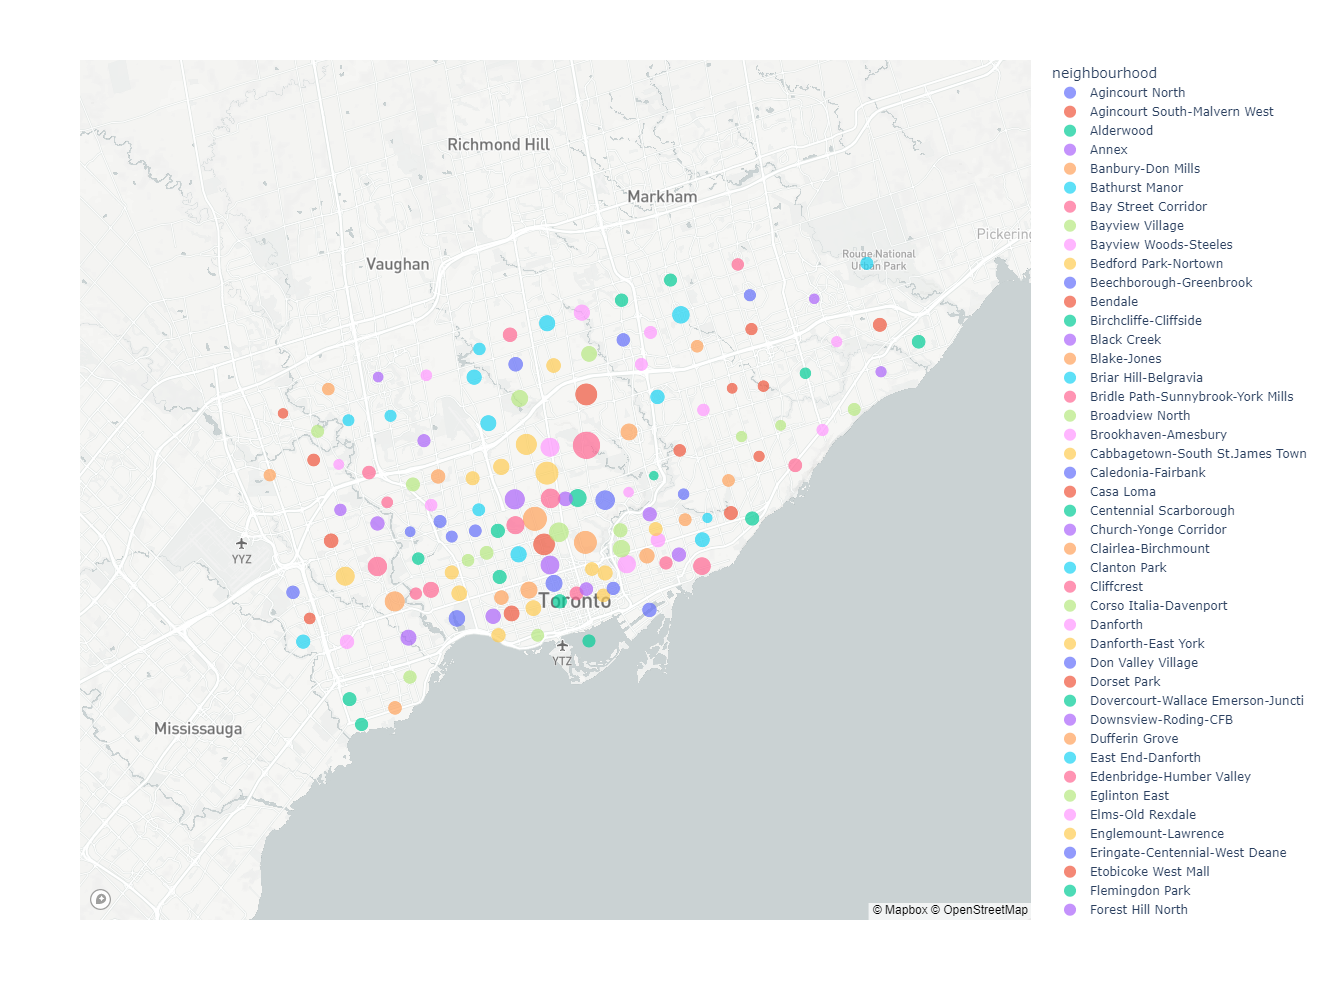

In [138]:
# Create a scatter mapbox to analyze neighbourhood info
map_plot = px.scatter_mapbox(
    to_average_data_merged_location,
    lat="lat",
    lon="lon",
    size="average_house_value",
    color="neighbourhood",
    zoom=10,
    width=1000,
    height=1000
)

# Display the map
map_plot.show()

- - -

## Cost Analysis - Optional Challenge

In this section, you will use Plotly express to a couple of plots that investors can interactively filter and explore various factors related to the house value of the Toronto's neighbourhoods. 

### Create a bar chart row facet to plot the average house values for all Toronto's neighbourhoods per year

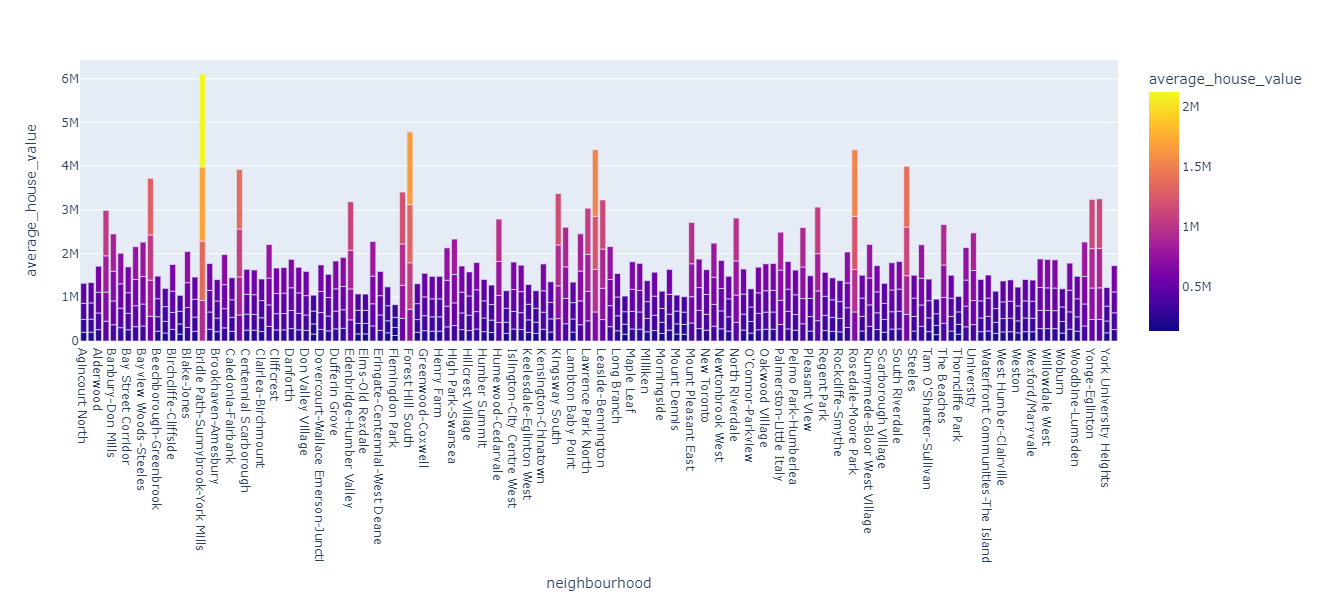

In [144]:
px.bar(to_data, x='neighbourhood', y='average_house_value', height=600, color='average_house_value')

### Create a sunburst chart to conduct a costs analysis of most expensive neighbourhoods in Toronto per year

In [147]:
# Fetch the data from all expensive neighbourhoods per year.
all_data = to_data.reset_index()
all_data.head()

,year,neighbourhood,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
0,2001,Agincourt North,3715,1480,0,1055,1295,195,185,5,200388,810,870
1,2001,Agincourt South-Malvern West,3250,1835,0,545,455,105,425,0,203047,806,892
2,2001,Alderwood,3175,315,0,470,50,185,370,0,259998,817,924
3,2001,Annex,1060,6090,5,1980,605,275,3710,165,453850,1027,1378
4,2001,Banbury-Don Mills,3615,4465,0,240,380,15,1360,0,371864,1007,1163


In [192]:
most_expensive = all_data.groupby(['neighbourhood', 'year']).max().sort_values(by=['average_house_value'], ascending=False).reset_index()
top_10_2001 = most_expensive[most_expensive['year']==2001].head(10)
top_10_2006 = most_expensive[most_expensive['year']==2006].head(10)
top_10_2011 = most_expensive[most_expensive['year']==2011].head(10)
top_10_2016 = most_expensive[most_expensive['year']==2016].head(10)
top_10_expensive_by_year = pd.concat([top_10_2001, top_10_2006, top_10_2011, top_10_2016])
top_10_expensive_by_year.head()

,neighbourhood,year,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
32,Bridle Path-Sunnybrook-York Mills,2001,2275,110,0,25,15,10,20,0,927466,1983,1790
68,Forest Hill South,2001,1815,2440,5,65,45,85,1010,15,726664,1001,1469
86,Lawrence Park South,2001,3590,570,0,170,70,190,845,40,664712,1021,1630
87,Rosedale-Moore Park,2001,2610,3880,0,520,225,290,1735,0,664476,1219,1540
119,St.Andrew-Windfields,2001,3275,1455,0,220,555,45,525,5,607040,1055,1551


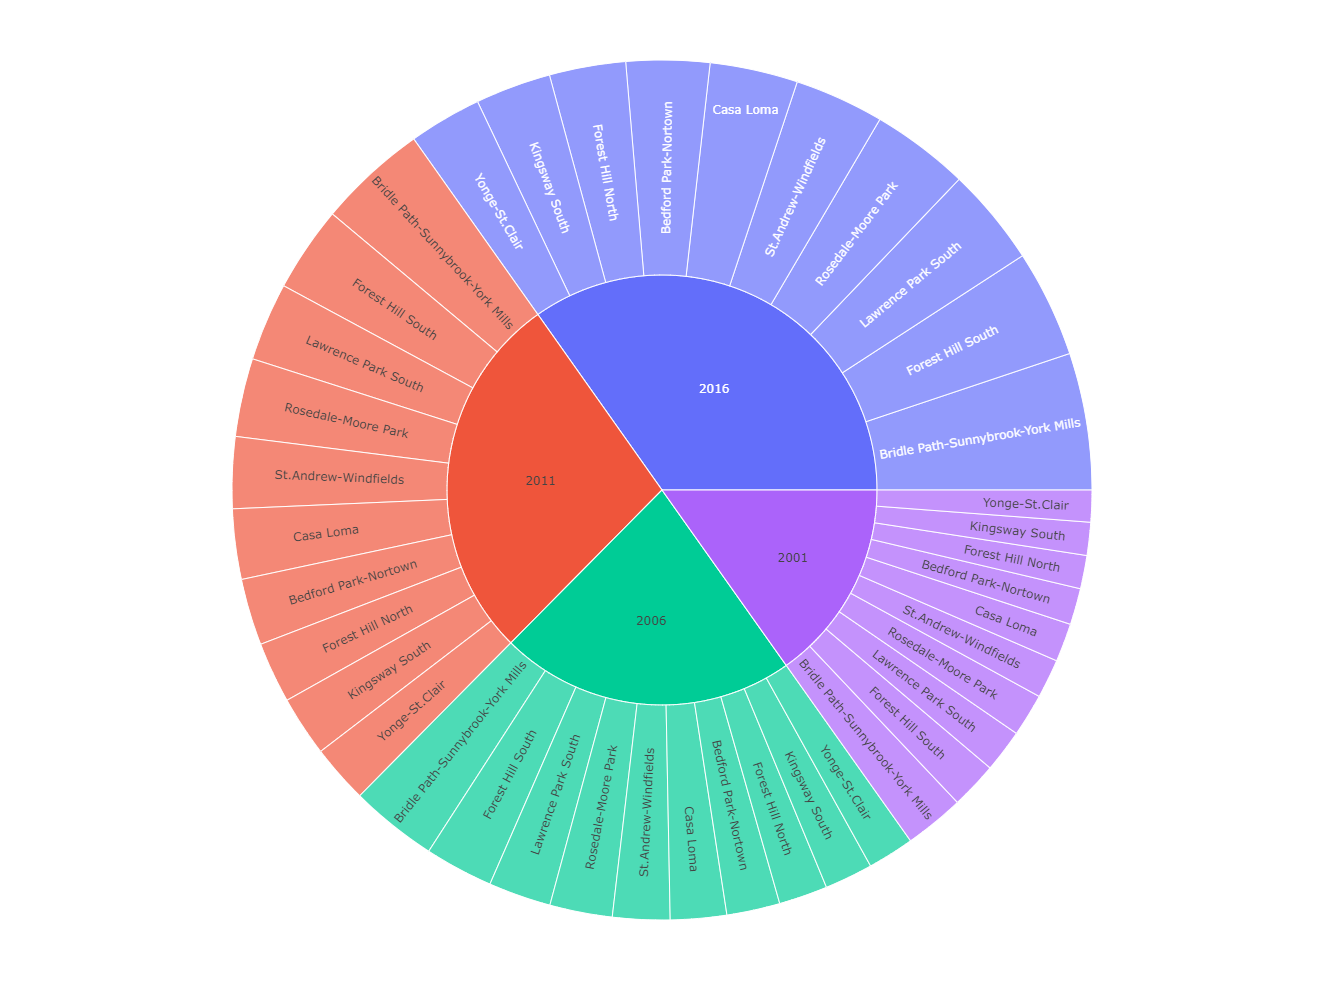

In [193]:
# Create the sunburst chart
fig = px.sunburst(top_10_expensive_by_year, path=['year', 'neighbourhood'], values='average_house_value', height=1000)
fig.show()